In [3]:
pip install sodapy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [4]:
pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import opendatasets
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import pyarrow.feather as feather
import os
import folium
import dask.dataframe as dd
%matplotlib inline

In [102]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

#see here https://dev.socrata.com/foundry/data.cityofnewyork.us/nc67-uf89

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", None)

#APiKey ID: 8snpjf5l16qfu634ab2d2tvih
#APIKey: 56k8kcn3t2qint7xcl4cwn2owglxboncxi0a19p8fey1ln3hol

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofnewyork.us,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("nc67-uf89", limit=5000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [103]:
print(results_df)

        plate state license_type summons_number  issue_date violation_time  \
0     21273NC    NY          COM     8809440328  08/10/2022         02:40P   
1     93696MJ    NY          COM     8809439764  08/06/2022         01:17P   
2     722124R    NJ          PAS     8822917868  09/03/2020         07:48A   
3     675487R    NJ          PAS     8822917870  09/03/2020         07:49A   
4     T902347    NJ          PAS     8822917881  09/03/2020         08:08A   
...       ...   ...          ...            ...         ...            ...   
4995   731PWA    IN          PAS     8823171192  09/30/2020         10:30A   
4996  HKZ3369    NY          PAS     8823171271  09/30/2020         11:42A   
4997   E18KYF    NJ          PAS     8823171295  09/30/2020         11:53A   
4998  633592R    NJ          PAS     8823171313  09/30/2020         12:26P   
4999  HJG1109    NY          PAS     8823171325  09/30/2020         01:34P   

                           violation fine_amount penalty_amount

In [104]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   plate                5000 non-null   object
 1   state                5000 non-null   object
 2   license_type         5000 non-null   object
 3   summons_number       5000 non-null   object
 4   issue_date           5000 non-null   object
 5   violation_time       4998 non-null   object
 6   violation            4998 non-null   object
 7   fine_amount          4998 non-null   object
 8   penalty_amount       4998 non-null   object
 9   interest_amount      4998 non-null   object
 10  reduction_amount     4998 non-null   object
 11  payment_amount       4998 non-null   object
 12  amount_due           4998 non-null   object
 13  precinct             4998 non-null   object
 14  county               4998 non-null   object
 15  issuing_agency       4998 non-null   object
 16  violat

In [105]:
cols_to_keep =['state',
               'plate',
               'license_type',
               'issue_date',
               'violation_time',
               'violation',
               'fine_amount',
               'penalty_amount',
               'interest_amount',
               'precinct',
               'county',
               'violation_status',
               'summons_image',
               'issuing_agency']

In [106]:
df = results_df[cols_to_keep].copy() # making a copy detaches this from the origional sample_df and raw_df
df

,state,plate,license_type,issue_date,violation_time,violation,fine_amount,penalty_amount,interest_amount,precinct,county,violation_status,summons_image,issuing_agency
0,NY,21273NC,COM,08/10/2022,02:40P,NO STOPPING-DAY/TIME LIMITS,115,0,0,009,NY,HEARING HELD-GUILTY,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,TRAFFIC
1,NY,93696MJ,COM,08/06/2022,01:17P,NO STANDING-DAY/TIME LIMITS,115,30,0,001,NY,HEARING HELD-GUILTY REDUCTION,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,TRAFFIC
2,NJ,722124R,PAS,09/03/2020,07:48A,NO PARKING-STREET CLEANING,65,10,0,042,BX,NaN,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,TRAFFIC
3,NJ,675487R,PAS,09/03/2020,07:49A,NO PARKING-STREET CLEANING,65,10,0,042,BX,NaN,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,TRAFFIC
4,NJ,T902347,PAS,09/03/2020,08:08A,NO PARKING-STREET CLEANING,65,10,0,042,BX,NaN,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,TRAFFIC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,IN,731PWA,PAS,09/30/2020,10:30A,FIRE HYDRANT,115,10,0,033,NY,NaN,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,TRAFFIC
4996,NY,HKZ3369,PAS,09/30/2020,11:42A,NO STANDING-EXC. TRUCK LOADING,95,60,3.48,033,NY,NaN,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,TRAFFIC
4997,NJ,E18KYF,PAS,09/30/2020,11:53A,FIRE HYDRANT,115,60,5.19,033,NY,NaN,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,TRAFFIC
4998,NJ,633592R,PAS,09/30/2020,12:26P,NO STANDING-DAY/TIME LIMITS,115,10,0,033,NY,NaN,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,TRAFFIC


In [107]:
df['violation'].unique()

array(['NO STOPPING-DAY/TIME LIMITS', 'NO STANDING-DAY/TIME LIMITS',
       'NO PARKING-STREET CLEANING', 'FIRE HYDRANT', 'CROSSWALK',
       'FRONT OR BACK PLATE MISSING', 'REG. STICKER-EXPIRED/MISSING',
       'DOUBLE PARKING', 'NO PARKING-DAY/TIME LIMITS',
       'FAIL TO DSPLY MUNI METER RECPT', 'SIDEWALK',
       'NO STANDING-COMM METER ZONE', 'EXPIRED MUNI METER',
       'NO STANDING-EXC. TRUCK LOADING', 'NO STANDING-BUS STOP',
       'NO STANDING-EXC. AUTH. VEHICLE', 'DOUBLE PARKING-MIDTOWN COMML',
       'NO STANDING-BUS LANE', 'INTERSECTION',
       'INSP. STICKER-EXPIRED/MISSING', 'WRONG WAY',
       'NO MATCH-PLATE/STICKER', 'BIKE LANE', 'SAFETY ZONE',
       'COMML PLATES-UNALTERED VEHICLE', 'UNALTERED COMM VEHICLE',
       'OBSTRUCTING DRIVEWAY', 'DETACHED TRAILER',
       'PLTFRM LFTS LWRD POS COMM VEH', nan,
       "INSP STICKER-MUTILATED/C'FEIT", 'FEEDING METER',
       'NON-COMPLIANCE W/ POSTED SIGN', 'NO STANDING-COMMUTER VAN STOP',
       'PEDESTRIAN RAMP', 'NO PARKI

In [108]:
df['violation'].value_counts()

FIRE HYDRANT                      1181
NO PARKING-STREET CLEANING         794
NO STANDING-DAY/TIME LIMITS        456
NO PARKING-DAY/TIME LIMITS         401
FAIL TO DSPLY MUNI METER RECPT     380
DOUBLE PARKING                     291
INSP. STICKER-EXPIRED/MISSING      246
REG. STICKER-EXPIRED/MISSING       179
NO STANDING-BUS STOP               151
CROSSWALK                          118
FRONT OR BACK PLATE MISSING        115
NO STANDING-COMM METER ZONE        101
SAFETY ZONE                         89
NO STANDING-EXC. AUTH. VEHICLE      74
NO STANDING-EXC. TRUCK LOADING      68
EXPIRED MUNI METER                  67
PLTFRM LFTS LWRD POS COMM VEH       33
SIDEWALK                            31
BIKE LANE                           30
DOUBLE PARKING-MIDTOWN COMML        29
FAIL TO DISP. MUNI METER RECPT      27
NO STOPPING-DAY/TIME LIMITS         27
NO MATCH-PLATE/STICKER              16
DETACHED TRAILER                    15
INTERSECTION                        12
EXPIRED MUNI MTR-COMM MTR

In [109]:
df[df['violation'].isin(['NO PARKING-STREET CLEANING', 'NO PARKING-DAY/TIME LIMITS', 'DOUBLE PARKING'])]

,state,plate,license_type,issue_date,violation_time,violation,fine_amount,penalty_amount,interest_amount,precinct,county,violation_status,summons_image,issuing_agency
2,NJ,722124R,PAS,09/03/2020,07:48A,NO PARKING-STREET CLEANING,65,10,0,042,BX,NaN,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,TRAFFIC
3,NJ,675487R,PAS,09/03/2020,07:49A,NO PARKING-STREET CLEANING,65,10,0,042,BX,NaN,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,TRAFFIC
4,NJ,T902347,PAS,09/03/2020,08:08A,NO PARKING-STREET CLEANING,65,10,0,042,BX,NaN,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,TRAFFIC
5,VA,U7462,PAS,09/03/2020,08:16A,NO PARKING-STREET CLEANING,65,10,0,042,BX,NaN,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,TRAFFIC
6,TX,82307U8,PAS,09/03/2020,08:25A,NO PARKING-STREET CLEANING,65,10,0,042,BX,NaN,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,TRAFFIC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4966,NY,35092MK,COM,09/18/2020,01:49P,DOUBLE PARKING,115,0,0,019,NY,HEARING PENDING,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,TRAFFIC
4977,NY,78091MH,COM,09/22/2020,01:31P,DOUBLE PARKING,115,0,0,019,NY,HEARING PENDING,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,TRAFFIC
4983,SC,NTR479,PAS,09/24/2020,11:09A,NO PARKING-STREET CLEANING,65,60,3.8,020,NY,NaN,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,TRAFFIC
4984,NY,GZX2187,PAS,09/25/2020,10:16A,NO PARKING-STREET CLEANING,65,60,3.8,019,NY,NaN,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,TRAFFIC


In [110]:
remap_violation_dict = {
    'NO PARKING-STREET CLEANING',
    'INSP. STICKER-EXPIRED/MISSING',
    'FAIL TO DSPLY MUNI METER RECPT',
    'NO PARKING-DAY/TIME LIMITS',
    'FIRE HYDRANT',
    'NO STANDING-DAY/TIME LIMITS',
    'DOUBLE PARKING',
    'REG. STICKER-EXPIRED/MISSING',
    'EXPIRED MUNI METER',
    'FRONT OR BACK PLATE MISSING',
    'NO STANDING-BUS STOP'
}


In [111]:
df['violation'].isna().sum()

2

In [112]:
df['violation'].unique()

array(['NO STOPPING-DAY/TIME LIMITS', 'NO STANDING-DAY/TIME LIMITS',
       'NO PARKING-STREET CLEANING', 'FIRE HYDRANT', 'CROSSWALK',
       'FRONT OR BACK PLATE MISSING', 'REG. STICKER-EXPIRED/MISSING',
       'DOUBLE PARKING', 'NO PARKING-DAY/TIME LIMITS',
       'FAIL TO DSPLY MUNI METER RECPT', 'SIDEWALK',
       'NO STANDING-COMM METER ZONE', 'EXPIRED MUNI METER',
       'NO STANDING-EXC. TRUCK LOADING', 'NO STANDING-BUS STOP',
       'NO STANDING-EXC. AUTH. VEHICLE', 'DOUBLE PARKING-MIDTOWN COMML',
       'NO STANDING-BUS LANE', 'INTERSECTION',
       'INSP. STICKER-EXPIRED/MISSING', 'WRONG WAY',
       'NO MATCH-PLATE/STICKER', 'BIKE LANE', 'SAFETY ZONE',
       'COMML PLATES-UNALTERED VEHICLE', 'UNALTERED COMM VEHICLE',
       'OBSTRUCTING DRIVEWAY', 'DETACHED TRAILER',
       'PLTFRM LFTS LWRD POS COMM VEH', nan,
       "INSP STICKER-MUTILATED/C'FEIT", 'FEEDING METER',
       'NON-COMPLIANCE W/ POSTED SIGN', 'NO STANDING-COMMUTER VAN STOP',
       'PEDESTRIAN RAMP', 'NO PARKI

In [113]:
df = pd.DataFrame(df['violation'].value_counts())
df

,violation
FIRE HYDRANT,1181
NO PARKING-STREET CLEANING,794
NO STANDING-DAY/TIME LIMITS,456
NO PARKING-DAY/TIME LIMITS,401
FAIL TO DSPLY MUNI METER RECPT,380
DOUBLE PARKING,291
INSP. STICKER-EXPIRED/MISSING,246
REG. STICKER-EXPIRED/MISSING,179
NO STANDING-BUS STOP,151
CROSSWALK,118


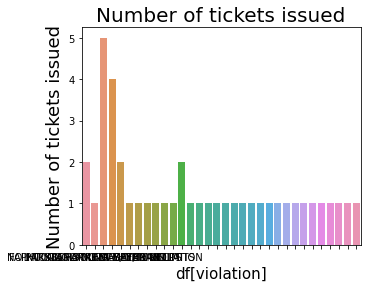

In [118]:
plt.figure(figsize=(5,4))
ax = sns.countplot(x="violation", data=df)
ax.set_xticklabels(labels= ['NO PARKING-STREET CLEANING',
'FAIL TO DSPLY MUNI METER RECPT',
'NO STANDING-DAY/TIME LIMITS',
'PHTO SCHOOL ZN SPEED VIOLATION',
'NO PARKING-DAY/TIME LIMITS',
'FIRE HYDRANT'
])
plt.title('Number of tickets issued', fontsize=20);
plt.xlabel('df[violation]', fontsize=15)
plt.ylabel('Number of tickets issued', fontsize=18);

ValueError: ignored

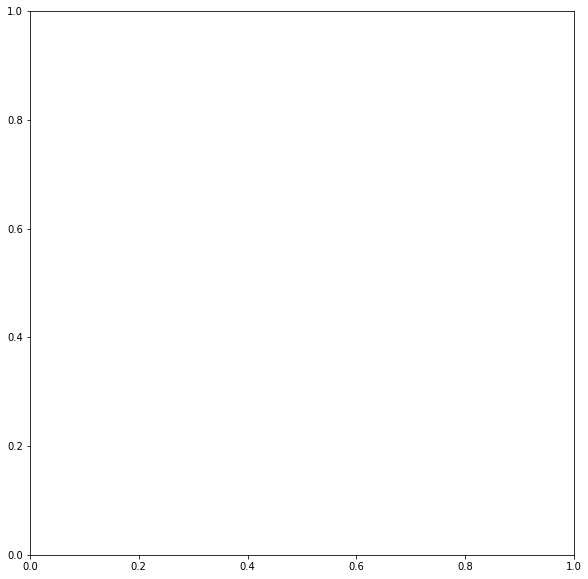

In [119]:
pie, ax = plt.subplots(figsize=[10,10])
plt.pie(x= df['violation'], autopct="%.1f%%", explode=[0.05]*5, labels=df.index, pctdistance=0.5)
plt.title("Percentage of tickets by each violation", fontsize=15);

FREQUENCY OF **TICKETS**

In [67]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

#see here https://dev.socrata.com/foundry/data.cityofnewyork.us/nc67-uf89

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", None)

#APiKey ID: 8snpjf5l16qfu634ab2d2tvih
#APIKey: 56k8kcn3t2qint7xcl4cwn2owglxboncxi0a19p8fey1ln3hol

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofnewyork.us,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("nc67-uf89", limit=5000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [68]:
print(results_df)

        plate state license_type summons_number  issue_date violation_time  \
0     EKF8364    NY          PAS     8609389868  09/19/2018         01:52P   
1     FSV3041    NY          PAS     8535413844  04/27/2017         04:23P   
2     GJT7152    NY          PAS     8535413819  04/27/2017         03:12P   
3     HJH2257    NY          PAS     8532454835  04/06/2017         09:18P   
4     GPN3936    NY          PAS     8535413972  04/28/2017         11:37A   
...       ...   ...          ...            ...         ...            ...   
4995  GHW1853    NY          PAS     4639202647  11/01/2017         02:55P   
4996   255047    DE          PAS     8601483471  02/04/2018         01:17A   
4997  EKM3009    NC          PAS     1433875676  01/01/2018         01:30A   
4998  HLD6415    NY          PAS     8602277477  03/01/2018         09:38A   
4999  DGP5342    NY          PAS     7460986112  05/18/2010            NaN   

                           violation fine_amount penalty_amount

In [42]:
import matplotlib.pyplot as plt

In [69]:
results_df.groupby('violation')['license_type'].apply(lambda x: x.value_counts().head(1)).reset_index(name='Count').rename(columns={'level_1': 'license_type'})

,violation,license_type,Count
0,ANGLE PARKING,PAS,2
1,BEYOND MARKED SPACE,PAS,7
2,BIKE LANE,PAS,15
3,BUS LANE VIOLATION,PAS,3
4,COMML PLATES-UNALTERED VEHICLE,COM,3
5,CROSSWALK,PAS,39
6,DOUBLE PARKING,PAS,123
7,DOUBLE PARKING-MIDTOWN COMML,COM,11
8,EXPIRED METER,PAS,1
9,EXPIRED MUNI METER,PAS,250


In [70]:
print('Number of Violations: ' + str(results_df['violation'].nunique()))

print('Average No.of Plates  per Violation: ' +  
      str(results_df.groupby('violation')['plate'].count().mean()))

Number of Violations: 54
Average No.of Plates  per Violation: 79.98148148148148


Time at which most tickets issued during the day

DAY OF THE **WEEK**

In [71]:
results_df = results_df[['issue_date', 'county', 'violation', 'precinct']].copy()
results_df

,issue_date,county,violation,precinct
0,09/19/2018,BX,REG. STICKER-EXPIRED/MISSING,046
1,04/27/2017,K,INSP. STICKER-EXPIRED/MISSING,079
2,04/27/2017,K,NON-COMPLIANCE W/ POSTED SIGN,079
3,04/06/2017,NY,FAIL TO DSPLY MUNI METER RECPT,006
4,04/28/2017,K,NO PARKING-STREET CLEANING,090
...,...,...,...,...
4995,11/01/2017,BX,PHTO SCHOOL ZN SPEED VIOLATION,000
4996,02/04/2018,BX,DOUBLE PARKING,040
4997,01/01/2018,K,OBSTRUCTING DRIVEWAY,069
4998,03/01/2018,BX,INSP. STICKER-EXPIRED/MISSING,052


In [122]:
results_df.groupby('issue_date')['violation'].apply(lambda x: x.value_counts().head(1)).reset_index(name='Count').rename(columns={'level_1': 'issue_date'})

,issue_date,issue_date,Count
0,01/03/2022,DOUBLE PARKING,2
1,01/04/2021,FIRE HYDRANT,10
2,01/05/2021,NO PARKING-STREET CLEANING,5
3,01/05/2022,NO PARKING-DAY/TIME LIMITS,1
4,01/06/2021,FIRE HYDRANT,11
...,...,...,...
651,12/28/2020,NO PARKING-STREET CLEANING,2
652,12/28/2021,NO STANDING-BUS STOP,1
653,12/29/2020,FIRE HYDRANT,8
654,12/30/2020,FIRE HYDRANT,7


In [63]:
results_df = results_df.set_index('issue_date', drop=True, append=False, inplace=False, verify_integrity=False).sort_index()


In [72]:
results_df

,issue_date,county,violation,precinct
0,09/19/2018,BX,REG. STICKER-EXPIRED/MISSING,046
1,04/27/2017,K,INSP. STICKER-EXPIRED/MISSING,079
2,04/27/2017,K,NON-COMPLIANCE W/ POSTED SIGN,079
3,04/06/2017,NY,FAIL TO DSPLY MUNI METER RECPT,006
4,04/28/2017,K,NO PARKING-STREET CLEANING,090
...,...,...,...,...
4995,11/01/2017,BX,PHTO SCHOOL ZN SPEED VIOLATION,000
4996,02/04/2018,BX,DOUBLE PARKING,040
4997,01/01/2018,K,OBSTRUCTING DRIVEWAY,069
4998,03/01/2018,BX,INSP. STICKER-EXPIRED/MISSING,052
